In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Load the dataset
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Summary statistics for numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
# Missing values count
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [5]:
# Columns with more than 5% nulls
missing_ratio = df.isna().mean()
missing_ratio[missing_ratio > 0.05]

Comments    1.0
dtype: float64

In [6]:
# Define key columns
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','Tamb','RH','WS','WSgust',	'WSstdev','WD','WDstdev','BP','Cleaning','Precipitation','TModA','TModB'
]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outlier_flags = (z_scores > 3)

# Count rows with any outliers
df_outliers = df[(outlier_flags).any(axis=1)]
print(f'Outlier rows: {len(df_outliers)}')

Outlier rows: 30964


In [7]:
# Impute with median (only for demo — use domain knowledge in real cases)
df_clean = df.copy()
for col in cols_to_check:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [8]:
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)

<Figure size 1400x600 with 0 Axes>

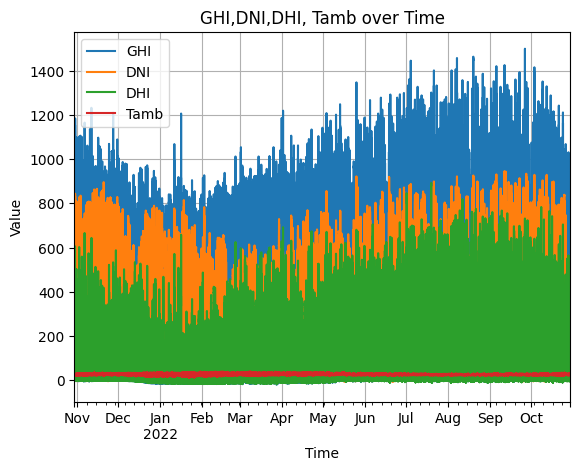

In [9]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

plt.figure(figsize=(14, 6))
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI','Tamb',]].plot()
plt.title('GHI,DNI,DHI, Tamb over Time')
plt.ylabel('Value')
plt.xlabel('Time')
plt.grid(True)
plt.show()

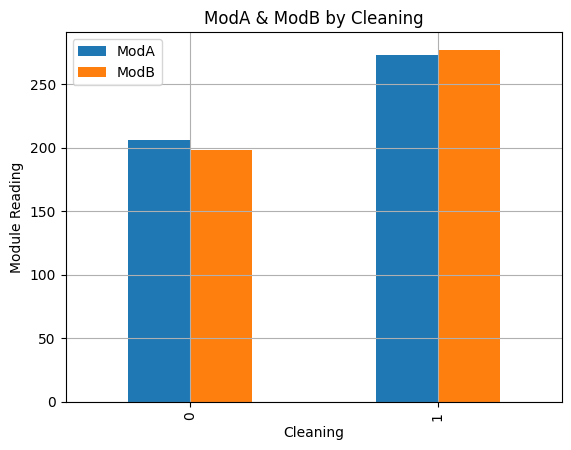

In [10]:
if 'Cleaning' in df_clean.columns:
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
    plt.title('ModA & ModB by Cleaning')
    plt.ylabel('Module Reading')
    plt.grid(True)
    plt.show()

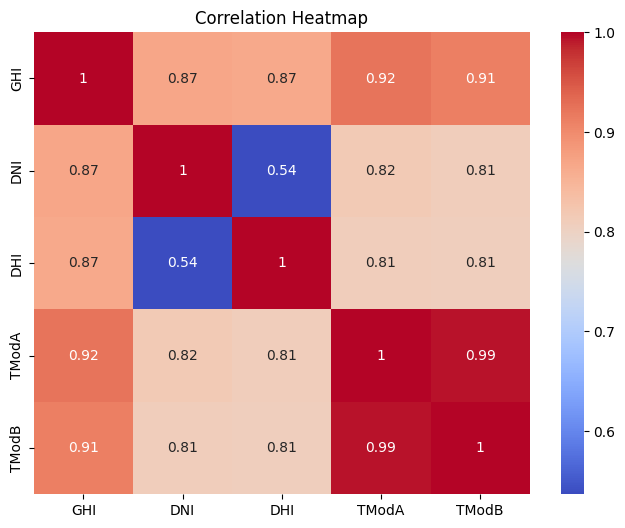

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


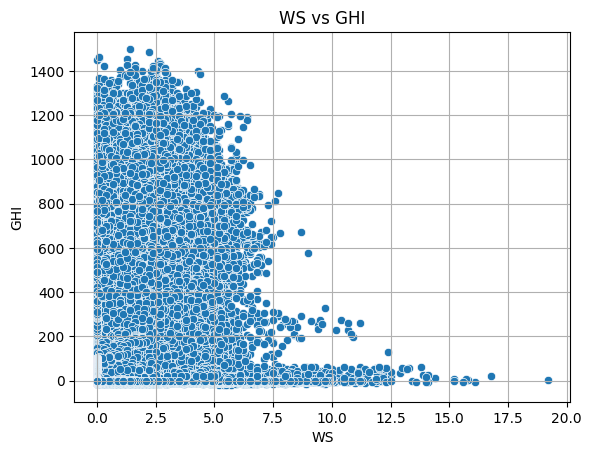

In [12]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('WS vs GHI')
plt.grid(True)
plt.show()


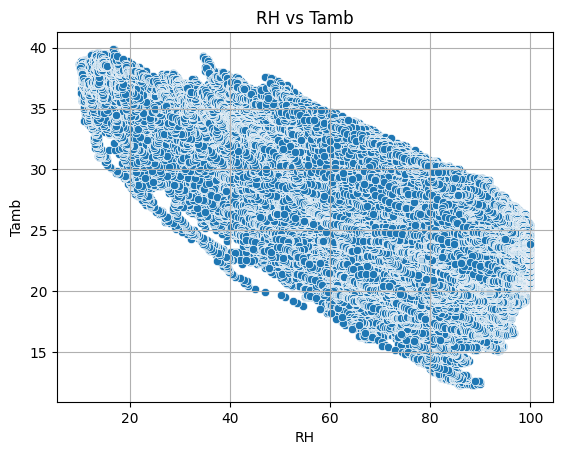

In [13]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('RH vs Tamb')
plt.grid(True)
plt.show()

In [14]:
# Requires windrose library: pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


ModuleNotFoundError: No module named 'windrose'

In [ ]:
df_clean['GHI'].hist(bins=30, figsize=(6,4))
plt.title('Histogram of GHI')
plt.grid(True)
plt.show()


In [ ]:
df_clean['WS'].hist(bins=30, figsize=(6,4))
plt.title('Histogram of WS')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df_clean, x='GHI', y='Tamb',
                 size='RH', color='RH', 
                 title='GHI vs Tamb (Bubble size = RH)')
fig.show()
